In [1]:
import numpy as np
import string

Let us first parse the whole folder that contains the .txt files and save all filenames, in order to work with them later.

In [2]:
import glob

filename_list = []

for filename in glob.glob('files/*.txt'):
    filename_list.append(filename)

To check ourselves, let's print out the first element of the filename_list list, along with its type:

In [3]:
print(filename_list[0])
print( type(filename_list[0]) ) 

files\1967-05-26.txt
<class 'str'>


This is how many files we are working with

In [4]:
N = len(filename_list)
print( N )

2886


Next, we take the first file, and do things to it. First of all, we need to get the year, month and date out of the filename.

We use the .split() method. It divides a string into parts dived by a prespecified symbol. Since our filename is "files/2014-12-08.txt", we need to first divide it by "/" into "files" and "2014-12-08.txt". Then, we divide the latter part by "." into "2014-12-08" and "txt". Finally, we divide the former bit into "2014", "12", "08" by using the "-" dividor. We will convert these srings into integers and store them into "year", "month" and "day" variable.

In [5]:
first_division = filename_list[0].split('\\')     # on unix, change to ..split('/')
print("the result of the first division: ")
print(first_division)

second_division = first_division[1].split('.')
print("the result of the second division: ")
print(second_division)

parsed_date = second_division[0].split('-')
print("the result of the third division: ")
print(parsed_date)

print("file from year " + parsed_date[0] + ", month " + parsed_date[1] + " and day " + parsed_date[2] + ".")

the result of the first division: 
['files', '1967-05-26.txt']
the result of the second division: 
['1967-05-26', 'txt']
the result of the third division: 
['1967', '05', '26']
file from year 1967, month 05 and day 26.


Since we parsed a string, the values for year, month, and day are in string format as well. Let us convert it to integers (numbers):

In [6]:
year = int( parsed_date[0] )
month = int( parsed_date[1] )
day = int( parsed_date[2] )

From document "article_parse", we already know what to do with a document once we open it. The last issue remaining is to work with every document. For every document in the folder, we read its filename, record the issue date, and then parse the text for feminine and masculine pronouns. Let begin by creating (empty) arrays that will store all the necessary data:

In [7]:
year_array = np.zeros(N)    # years of issues
fem_array = np.zeros(N)     # number of feminine pronouns
masc_array = np.zeros(N)    # number of maculine pronouns


for i in range(N):
    # here we're parsing filename of file number i between 0 and N
    first_division = filename_list[i].split('\\')           # on unix, change to ..split('/')
    second_division = first_division[1].split('.')
    parsed_date = second_division[0].split('-')

    # recording year values into arrays
    year_array[i] = int( parsed_date[0] )
    
    # next goes the opening the file code 
    with open(filename_list[i], 'r', encoding="utf8") as myfile:
        text = myfile.read()
    text = text.replace("\n", " ") # get rid of line breaks

    # removing punctuation and special symbols
    translation = str.maketrans("","", ',."“—’”‘/!-:[]?–|&\'▶~•_>{}()<>;·\\')    
    text = text.translate(translation)
    text = text.lower()  # removing upper case
    text = text.replace("  ", " ")   # in case there are double spaces
    
    # transforming text into array of words
    array_text = np.array(text.split(' '))
    
    fem = np.array(["she","her","hers","herself","female","woman","women","shes","womans"])
    mal = np.array(["he","his","himself","male","man","men", "hes", "mans"])
    
    ms = np.where( np.isin(array_text, fem) )[0]
    mr = np.where( np.isin(array_text, mal) )[0]
    
    # recording the number of mentions of men and women into respective array cells:
    fem_array[i] = len(ms)
    masc_array[i] = len(mr)

Our next issue is that there are many issues within the same year. For example, let's print the indices of all array elements (issues) that came out in 1990:

In [8]:
print(np.where(year_array == 1990))

(array([1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458,
       1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469,
       1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480,
       1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491,
       1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502,
       1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513,
       1514], dtype=int64),)


To group issues by year, let us first print and save all the years, in which at least one issue of the newspaper came out (and we have it in our dataset):

In [9]:
issue_years = np.unique(year_array)
print(issue_years)

[1967. 1968. 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979.
 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014.]


Note that we could have just entered every year from 1967 to 2014. However, this is sometimes risky to do so because some years may be missing.

It is useful to track how many issues come out every year, just in case. Also, we will be interested in the pronouns usage.

In [10]:
number_issues_year = []
fem_mentioned_year = []
masc_mentioned_year = []

What we do next is find every issue that came out in a given year, and add the mentions of men and women within this year. We also calculate the frequency of mentions per year, as different years may have different number of issues.

In [11]:
for year in issue_years:
    # find indices of all array entries corresponding to this year
    indices_year = np.where(year_array == year)
    number_issues_year.append( len(year_array[indices_year]) )
    fem_mentioned_year.append( np.sum( fem_array[indices_year] ) )
    masc_mentioned_year.append( np.sum( masc_array[indices_year] ) )

Finally, we would like to visualize the number of mentions of men and women.

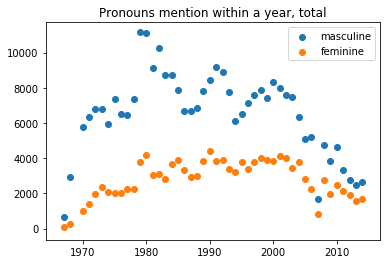

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plot1 = plt.scatter(issue_years, masc_mentioned_year)
plot2 = plt.scatter(issue_years, fem_mentioned_year)

plt.legend((plot1,plot2),("masculine","feminine") )
plt.title("Pronouns mention within a year, total")
plt.draw()

In [13]:
num_years = len(issue_years)
np_fem_freq = np.zeros(num_years)
np_masc_freq = np.zeros(num_years)

for i in range(num_years):
    np_fem_freq[i] = fem_mentioned_year[i] / number_issues_year[i]
    np_masc_freq[i] = masc_mentioned_year[i] / number_issues_year[i]

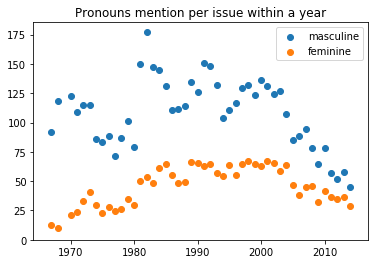

In [14]:
plot1 = plt.scatter(issue_years, np_masc_freq)
plot2 = plt.scatter(issue_years, np_fem_freq)

plt.legend((plot1,plot2),("masculine","feminine") )
plt.title("Pronouns mention per issue within a year")
plt.draw()